In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load and Evaluate the Best Model on Testing Data

In [4]:
mnist_test_data = pd.read_csv("mnist_test.csv")
mnist_test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Extract labels and pixel values
X_test = mnist_test_data.iloc[:, 1:]
y_test = mnist_test_data["label"]

In [6]:
# Normalize and reshape images
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28)

In [7]:
# Flatten images for both K-NN and ANN
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [8]:
# Load the best ANN model
from tensorflow import keras
loaded_model = keras.models.load_model("best_model.h5")

In [9]:
# Evaluate on test set
accuracy_test = loaded_model.evaluate(X_test_flatten, y_test)[1]
print(f"Accuracy on Test Set: {accuracy_test}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0826 - accuracy: 0.9775
Accuracy on Test Set: 0.9775000214576721


In [10]:
# Use the loaded model to predict on the test set
y_test_pred_probs = loaded_model.predict(X_test_flatten)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

313/313 [==============================] - 0s 1ms/step


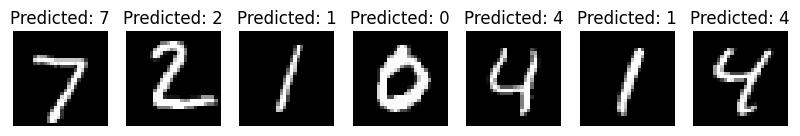

In [13]:
# Visualize a few test images along with their predicted labels
plt.figure(figsize=(10, 2))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Predicted: {y_test_pred[i]}")
    plt.axis("off")
plt.show()